<a href="https://colab.research.google.com/github/UlugbekSalaev/UzStemming_NeuralNetwork/blob/main/UzStemming_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Network Architecture
*   Word embedding: One-hot encoding
*   Learning rate (alpha): 0.001
*   Dropout: 0.2 ~ 0.5
*   Iteration for sample (max epoch for word): 100
*   Epoch for dataset: 10
*   Activation function: Sigmoid
*   Error function (Loss function):
   *   Mean Squared Error (MSE)
*   Type of GD (Gradient Descent):
   *   Stochastic (batch=1),
*   Optimizers:  Adam
*   Model:


### Neural Net Architecture:
- Input layer size  = char_len × max_word_len
- Output layer size = same as input (autoencoder-like structure)
- Activation        = Sigmoid
- Loss              = Mean Squared Error (MSE)

Trainable Parameters:
- weight: shape = [input_dim, output_dim], random init
- bias: shape = [output_dim], random init

Training Hyperparameters:
- l_rate (learning rate)    → user-defined
- max_epoch (per word)      → user-defined
- error (MSE threshold)     → user-defined


In [ ]:
import itertools
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import os

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/Prog/'
datafile = "dataset.txt"

max_word_len=25

char_list=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','x','y','z','c','‘',"ʼ"] # '-',
char_len=len(char_list)

solid_sign = ["sun‘iy", "sur‘at", "jur‘at", "sa‘y", 'a‘lo', 'a‘yon', 'a‘zo', 'ba‘zan', 'ba‘zi', 'da‘vo', 'e‘lon',
              'e‘tibor', 'e‘tirof', 'iste‘dod', 'iste‘mol', 'ma‘lum', 'ma‘lumot', 'ma‘no', 'ma‘qul', 'ma‘muriyat',
              'mas‘ul', 'mash‘um', 'me‘mor', 'me‘yor', 'noma‘lum', 'qal‘a', 'qat‘i', 'qat‘iy', 'qur‘on', 'ra‘no',
              'san‘at', 'she‘r', 'ta‘kid', 'ta‘lim', 'ta‘min', 'ta‘mir', 'ta‘sir', 'a‘lam']

def word_normalizer(word):
    word=word.lower()
    word=word.strip()
    word = word.replace("'", "‘")
    word = word.replace("`", "‘")
    word = word.replace("‘", "‘")
    word = word.replace("‘", "‘")
    word = word.replace("‘", "‘")
    word = word.replace("’", "‘")
    for x in solid_sign:
        if(x in word):
            word=word.replace("‘","ʼ")
            start = word.find(x)
            if start != -1:
              end = start + len(x)
              fixed_part = x.replace('‘', 'ʼ') # Step 2: Replace ‘ with ʼ in the matched part only
              word = word[:start] + fixed_part + word[end:] # Step 3: Reconstruct the word
    return word


def WordToVec(word):
  vector = np.zeros((max_word_len, char_len), dtype=int)

  for i, char in enumerate(word):
    if i >= max_word_len:
      break

    vector[i, char_list.index(char)] = 1

  return vector.flatten()


def VecToWord(vec):
  threshold_ = 0.5
  word=''
  matrix=np.array(vec).reshape(max_word_len, char_len)
  for row in matrix:
    if np.sum(row)==0:
      break
    if np.max(row)>threshold_:
      word+=char_list[np.argmax(row)]

  return word

In [ ]:
l=WordToVec('arxividan')
print(char_len)
print(len(l))
VecToWord(l)

28
700


'arxividan'

In [ ]:
def CheckChar(word):
  for char in word:
    if char not in char_list:
      print(word)
      return False
  return True

def CollectData():
  data=[]
  with open(path+datafile,'r',encoding='utf8') as file:
    lines=file.readlines()
    for line in lines:
      if line.endswith('\n'):
        line = line[:-1]
      line=word_normalizer(line)
      splited_line = line.split('/')
      stem = splited_line[0]
      affix = splited_line[1]
      word = line.replace('/', '')

      if CheckChar(word):
        vec = WordToVec(word)
        target_vec=WordToVec(stem)
        data.append({'line':line,'word':word, 'word_vec':vec, 'stem':stem, 'stem_vec':target_vec})

  return data

In [ ]:
data=CollectData()
print(data[0]['line'])
print(data[0]['word'])
# print(data[0]['word_vec'])
print(data[0]['stem'])
# print(data[0]['stem_vec'])

rossiya/da
rossiyada
rossiya


In [ ]:
class TrainWithBackpropagation:
    def __init__(self, l_rate, max_epoch_of_word, error):
      self.__max_word_len = max_word_len
      self.__char_len=char_len
      self.__weight = np.random.rand(self.__char_len * self.__max_word_len, self.__char_len * self.__max_word_len)
      self.__bias = np.random.rand(self.__char_len * self.__max_word_len)
      print('weight bilan bias random bilan tanlab olindi...')
      # parametrlar:
      self.__l_rate = l_rate
      self.__max_epoch=max_epoch_of_word
      self.__error=error

      self.__data=CollectData()


    def __Sigmoid(self, net):
      return 1.0/(1+np.exp(-net))

    def __MSE(self, target, output):
      return (1/2)*np.sum(np.square(np.array(target)-np.array(output)))

    def __TrainData(self, input_vec, target_vec):
        input_vec=np.array(input_vec)
        target_vec=np.array(target_vec)


        output_vec = self.__Sigmoid(np.dot(input_vec,self.__weight) + self.__bias)
        mse_error=self.__MSE(target_vec,output_vec)

        epoch=0
        while True:
            if (np.abs(mse_error)<self.__error) or (epoch>self.__max_epoch):
                break
            self.__weight += self.__l_rate *np.matmul(input_vec.reshape(self.__max_word_len*self.__char_len,1),np.array((target_vec-output_vec)*output_vec*(1-output_vec)).reshape(1,self.__char_len * self.__max_word_len))
            self.__bias += self.__l_rate * (target_vec-output_vec)*output_vec*(1-output_vec)
            output_vec = self.__Sigmoid(np.dot(input_vec, self.__weight) + self.__bias)
            mse_error = self.__MSE(target_vec, output_vec)
            epoch+=1

        return output_vec, epoch

    def Fit(self,epoches=1, temp=0):
        loss_per_epoch = []
        for epoch in range(epoches):
          cnt=0
          error_cnt=0
          epoch_loss = 0  # Sum MSEs for this epoch (Using in calcualtion loss)

          for raw in self.__data:
            cnt+=1
            output_vec, word_epoch = self.__TrainData(raw['word_vec'], raw['stem_vec'])

            # Calculate and accumulate loss (MSE)
            mse_error = self.__MSE(raw['stem_vec'], output_vec)
            epoch_loss += mse_error
            # end for loss calcualtion

            predict=VecToWord(output_vec)
            result=predict==raw['stem']
            if not result:
              error_cnt+=1

            if not temp==0:
              print('epoch: ',temp,'\tline :',cnt,'\tepoch of word:', word_epoch,'\traw : ',raw['line'], '\tpredict: ',predict,'\tnatija : ', result,'\terror(%):',round(error_cnt/cnt*100,2),'\n')
            else:
              print('epoch: ',epoch+1,'\tline :',cnt,'\tepoch of word:', word_epoch,'\traw : ',raw['line'], '\tpredict: ',predict,'\tnatija : ', result,'\terror(%):',round(error_cnt/cnt*100,2),'\n')

        # Average loss this epoch
        loss_per_epoch.append(epoch_loss / cnt)

        print("Training muvafaqiyatli tugadi!!!")

        return self.__weight, self.__bias, loss_per_epoch


    def CheckWithData(self):
        false_ans=[]
        true_answer=0
        for raw in self.__data:
            input_vec = raw['word_vec']
            stem = raw['stem']
            output_vec = self.__Sigmoid(np.dot(input_vec, self.__weight) + self.__bias)
            predict=VecToWord(output_vec)
            result=predict==stem
            if result:
              true_answer+=1
            else:
              false_ans.append([raw['line'],raw['stem'], predict])

        return round(true_answer/len(self.__data)*100 , 2), false_ans

    def __SaveWeightAndBias(self, folder, epoch, weight, bias, false_answer):
      np.savetxt(folder+'/Weight_with_epoch_'+str(epoch)+'.txt',weight)
      np.savetxt(folder+'/Bias_with_epoch_'+str(epoch)+'.txt',bias)
      with open(folder+'/False_answer_epoch_'+str(epoch)+'.txt','w',encoding='utf8') as file:
        for line in false_answer:
          file.write(line[0]+'\t'+line[1]+'\t'+line[2]+'\n')


    def AnalysisData(self, epoches=0):
      X=[]
      Y=[]
      Y_loss = []
      max_accurecy=0
      max_acc_weight=[]
      max_acc_bias=[]
      max_epoch=0
      max_epoch_false_ans=[]

      dir=path+'/Analysis '+dt.datetime.now().strftime("%d.%m.%Y %H-%M")
      os.makedirs(dir, exist_ok=True)
      with open(dir+'/Time_for_analysis_epoch_'+str(epoches)+'.txt','w',encoding='utf8') as tmfile:

        for epoch in range(1,epoches+1):
          X.append(epoch)
          dt_start=dt.datetime.now()

          # self.Fit(temp=epoch)
          _, _, loss_per_epoch = self.Fit(temp=epoch)

          dt_finish=dt.datetime.now()
          acc,false_ans=self.CheckWithData()
          dch_finish=dt.datetime.now()
          Y.append(acc)
          Y_loss.append(loss_per_epoch[-1])  # Last epoch's loss

          if acc>max_accurecy:
            max_accurecy=acc
            max_acc_weight=self.__weight
            max_acc_bias=self.__bias
            max_epoch=epoch
            max_epoch_false_ans=false_ans

          tmfile.write('epoch : '+str(epoch)+'\n')
          tmfile.write('train_time: '+str(dt_start-dt_finish)+' \t start : '+str(dt_start)+'\t finish : '+str(dt_finish)+'\t Check finish : '+str(dch_finish)+'\n')

      self.__SaveWeightAndBias(dir,max_epoch, max_acc_weight, max_acc_bias, max_epoch_false_ans)

      # Plot accuracy
      plt.figure()
      plt.xlabel('Epoch')
      plt.ylabel('Accuracy ( % )')
      plt.plot(X,Y, label="Accaracy (%)")
      plt.legend()
      plt.savefig(dir+'/Analysis_'+str(myepoch)+'_epoch.png')

      # Plot loss
      plt.figure()
      plt.xlabel('Epoch')
      plt.ylabel('Loss (MSE)')
      plt.plot(X, Y_loss, color='red', label='Loss (MSE)')
      plt.legend()
      plt.savefig(dir + '/Analysis_loss_' + str(myepoch) + '_epoch.png')

      return X,Y

Streaming output truncated to the last 5000 lines.

epoch:  10 	line : 4551 	epoch of word: 49 	raw :  kir/gan 	predict:  kir 	natija :  True 	error(%): 1.16 

epoch:  10 	line : 4552 	epoch of word: 0 	raw :  yil/ida 	predict:  yil 	natija :  True 	error(%): 1.16 

epoch:  10 	line : 4553 	epoch of word: 0 	raw :  yo‘nalish/lariga 	predict:  yo‘nalish 	natija :  True 	error(%): 1.16 

epoch:  10 	line : 4554 	epoch of word: 0 	raw :  jarayon/lari 	predict:  jarayon 	natija :  True 	error(%): 1.16 

epoch:  10 	line : 4555 	epoch of word: 0 	raw :  bosqich/da 	predict:  bosqich 	natija :  True 	error(%): 1.16 

epoch:  10 	line : 4556 	epoch of word: 0 	raw :  imtihon/ 	predict:  imtihon 	natija :  True 	error(%): 1.16 

epoch:  10 	line : 4557 	epoch of word: 11 	raw :  kir/ish 	predict:  kir 	natija :  True 	error(%): 1.16 

epoch:  10 	line : 4558 	epoch of word: 0 	raw :  test/ 	predict:  test 	natija :  True 	error(%): 1.16 

epoch:  10 	line : 4559 	epoch of word: 0 	raw :  qada/

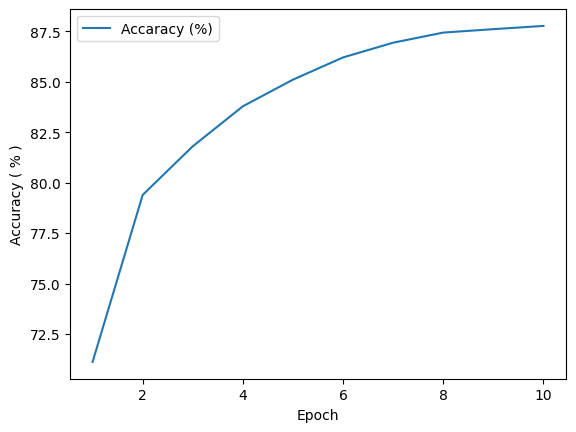

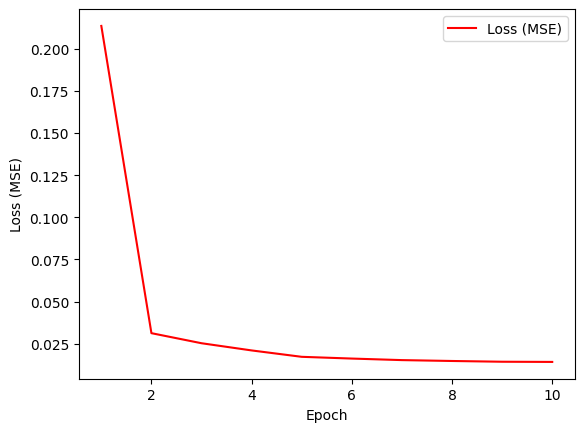

In [ ]:
obj=TrainWithBackpropagation(l_rate=0.1, max_epoch_of_word=100, error=0.01)
obj.AnalysisData(epoches=10)

In [ ]:
# Finding best threshold value
import numpy as np

max_word_len = 25
char_list = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p', 'q','r','s','t','u','v','w','x','y','z','‘','ʼ']
char_len = len(char_list)

path = '/content/drive/MyDrive/Colab Notebooks/Prog/'
datafile = "dataset.txt"

weight_file = path + 'Analysis/Weight_with_epoch_10.txt'
bias_file = path + 'Analysis/Bias_with_epoch_10.txt'

def word_normalizer(word):
    word = word.lower().strip()
    word = word.replace("'", "‘").replace("`", "‘").replace("’", "‘")
    return word

def WordToVec(word):
    vector = np.zeros((max_word_len, char_len), dtype=int)
    for i, char in enumerate(word):
        if i >= max_word_len:
            break
        if char in char_list:
            vector[i, char_list.index(char)] = 1
    return vector.flatten()

def VecToWord(vec, threshold=0.5):
    word = ''
    matrix = np.array(vec).reshape(max_word_len, char_len)
    for row in matrix:
        if np.sum(row) == 0:
            break
        if np.max(row) > threshold:
            word += char_list[np.argmax(row)]
    return word

def sigmoid(net):
    return 1.0 / (1 + np.exp(-net))

def CollectData():
    data = []
    with open(path + datafile, 'r', encoding='utf8') as file:
        lines = file.readlines()
        for line in lines:
            line = line.strip()
            line = word_normalizer(line)
            splited_line = line.split('/')
            if len(splited_line) < 2:
                continue  # skip malformed lines
            stem = splited_line[0]
            affix = splited_line[1]
            word = line.replace('/', '')

            vec = WordToVec(word)
            target_vec = WordToVec(stem)
            data.append({'line': line, 'word': word, 'word_vec': vec,
                         'stem': stem, 'stem_vec': target_vec})
    return data

weight = np.loadtxt(weight_file).reshape(max_word_len * char_len, max_word_len * char_len)
bias = np.loadtxt(bias_file).reshape(max_word_len * char_len)

print("Loaded weights and biases.")

data = CollectData()
print(f"Loaded {len(data)} samples.")

best_threshold = 0.0
best_accuracy = 0.0

thresholds = np.arange(0.3, 0.91, 0.05)  # test from 0.3 to 0.9 in steps of 0.05

for threshold in thresholds:
    correct_count = 0
    for raw in data:
        input_vec = raw['word_vec']
        stem = raw['stem']
        output_vec = sigmoid(np.dot(input_vec, weight) + bias)
        predicted_stem = VecToWord(output_vec, threshold=threshold)

        if predicted_stem == stem:
            correct_count += 1

    accuracy = correct_count / len(data) * 100
    print(f"Threshold: {threshold:.2f} — Accuracy: {accuracy:.2f}%")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

print("\nBest Threshold:", best_threshold)
print("Best Accuracy:", best_accuracy, "%")

Loaded weights and biases.
Loaded 7049 samples.
Threshold: 0.30 — Accuracy: 86.52%
Threshold: 0.35 — Accuracy: 87.45%
Threshold: 0.40 — Accuracy: 87.70%
Threshold: 0.45 — Accuracy: 87.80%
Threshold: 0.50 — Accuracy: 87.79%
Threshold: 0.55 — Accuracy: 87.49%
Threshold: 0.60 — Accuracy: 86.84%
Threshold: 0.65 — Accuracy: 86.03%
Threshold: 0.70 — Accuracy: 84.75%
Threshold: 0.75 — Accuracy: 83.37%
Threshold: 0.80 — Accuracy: 81.05%
Threshold: 0.85 — Accuracy: 77.15%
Threshold: 0.90 — Accuracy: 68.93%

Best Threshold: 0.44999999999999996
Best Accuracy: 87.79968789899276 %


In [ ]:
# testing the model
import numpy as np

max_word_len = 25
char_list = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p',
             'q','r','s','t','u','v','w','x','y','z','‘','ʼ']
char_len = len(char_list)

def word_normalizer(word):
    word = word.lower().strip()
    word = word.replace("'", "‘")
    word = word.replace("`", "‘")
    word = word.replace("’", "‘")
    return word

def WordToVec(word):
    vector = np.zeros((max_word_len, char_len), dtype=int)
    for i, char in enumerate(word):
        if i >= max_word_len:
            break
        if char in char_list:
            vector[i, char_list.index(char)] = 1
    return vector.flatten()

def VecToWord(vec, threshold=0.5, row_sum_threshold=0.5):
    word = ''
    matrix = np.array(vec).reshape(max_word_len, char_len)
    for row in matrix:
        row_sum = np.sum(row)
        if row_sum < row_sum_threshold:
            break  # Stop prediction here
        max_idx = np.argmax(row)
        word += char_list[max_idx]
    return word

def sigmoid(net):
    return 1.0 / (1 + np.exp(-net))

weight_file = '/content/drive/MyDrive/Colab Notebooks/Prog/Analysis/Weight_with_epoch_10.txt'
bias_file = '/content/drive/MyDrive/Colab Notebooks/Prog/Analysis/Bias_with_epoch_10.txt'

weight = np.loadtxt(weight_file)
bias = np.loadtxt(bias_file)

weight = weight.reshape((max_word_len * char_len, max_word_len * char_len))
bias = bias.reshape((max_word_len * char_len,))

print("Loaded weight and bias successfully.")

while True:
    user_input = input("Enter a word (or 'exit' to quit): ").strip()
    if user_input.lower() == 'exit':
        break

    norm_word = word_normalizer(user_input)
    word_vec = WordToVec(norm_word)
    output_vec = sigmoid(np.dot(word_vec, weight) + bias)
    predicted_stem = VecToWord(output_vec, threshold=0.5, row_sum_threshold=0.5)

    print(f"Input word: {user_input}")
    print(f"Predicted stem: {predicted_stem}")
    print("-" * 40)

Loaded weight and bias successfully.
Input word: kelmasdan
Predicted stem: kel
----------------------------------------
Input word: kelmagani
Predicted stem: kel
----------------------------------------
Input word: aytmasligini
Predicted stem: ayt
----------------------------------------
Input word: qatnashmagandi
Predicted stem: qatnash
----------------------------------------
Input word: respublikasidagi
Predicted stem: respublika
----------------------------------------
